In [1]:
!pip install jupyter_contrib_nbextensions

In [2]:
!pip install scikit-learn
!pip install xgboost

In [3]:
# For data manipulation
import pandas as pd
import numpy as np
import zipfile

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# For models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy import stats

In [4]:
# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

# read the data 

In [5]:
loan = pd.read_csv('/Users/rufen/Documents/ClassIn Files/Files/DS/get_dummied_loan.csv')
loan.head(2)

,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,charged_off,earliest_cr_line_y,term_month_60,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
0,8.81,317.12,56000.0,20.53,7.0,1.0,10494,53.3,3.0,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,27.27,306.97,70000.0,11.37,4.0,0.0,3193,84.0,0.0,1,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
loan.shape

(1787930, 104)

Text(0.5, 1.0, 'Correlation of Charged Off with Features')

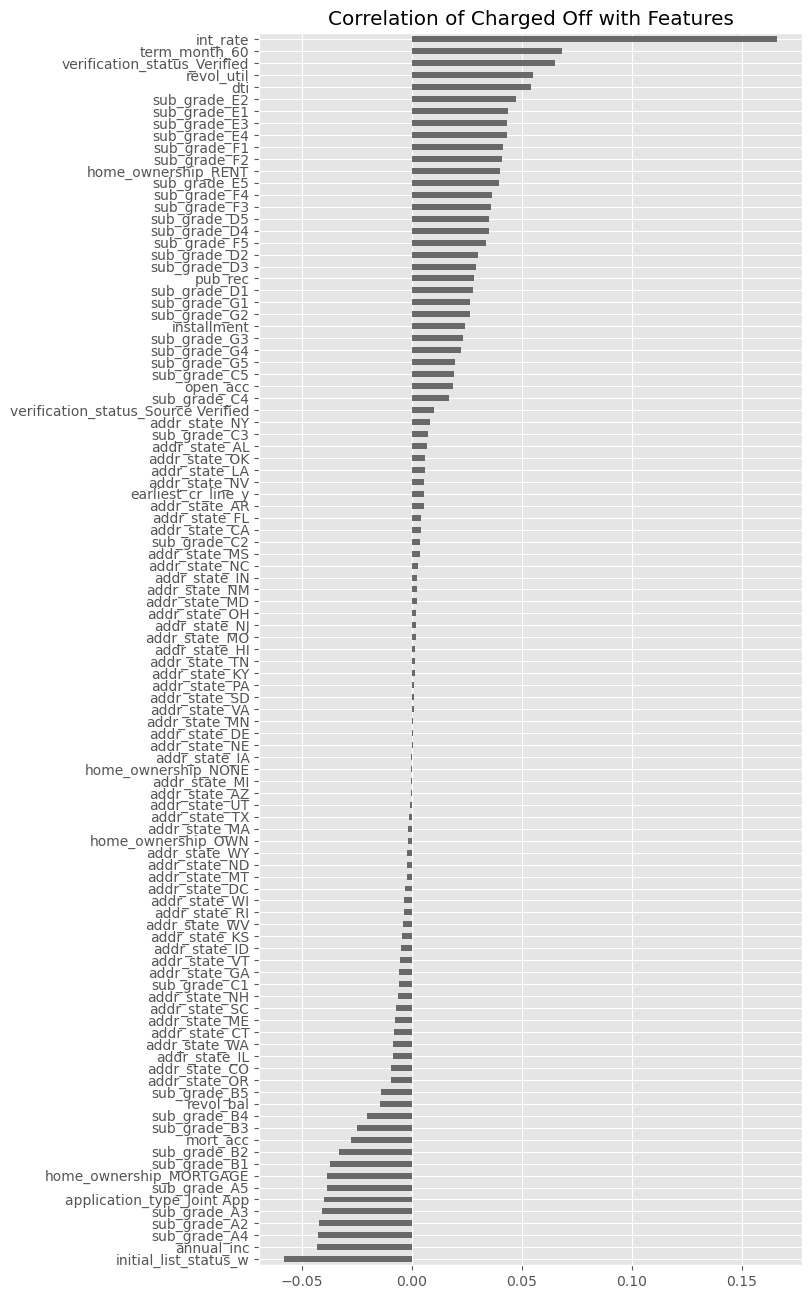

In [7]:
# show the correlation of each feature with target label
plt.figure(figsize=(7,16))
loan.corr().charged_off.sort_values()[:-1].plot.barh(color='#696969')
plt.title('Correlation of Charged Off with Features')

# Train/Validation set split

In [8]:
x = loan.drop(columns=['charged_off'])
y = loan['charged_off']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=666)

In [10]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1251551, 103)
x_test shape: (536379, 103)
y_train shape: (1251551,)
y_test shape: (536379,)


# down/up sampling

### as the EDA has shown, the target feature data is unbalanced, as we have sufficient data, we can do down sampling to ensure the data is original and trustful 

In [11]:
loan_positive = loan[loan['charged_off']==1]
loan_negtive = loan[loan['charged_off']==0]
loan_positive.shape,loan_negtive.shape

((131828, 104), (1656102, 104))

In [12]:
loan_negtive_down = loan_negtive.sample(n=loan_positive.shape[0], random_state=666)
loan_negtive_down.shape, loan_positive.shape

((131828, 104), (131828, 104))

In [13]:
loan_down = pd.concat([loan_positive, loan_negtive_down])

In [14]:
x_down = loan_down.drop(columns=['charged_off'])
y_down = loan_down['charged_off']
x_down_train, x_down_test, y_down_train, y_down_test = train_test_split(x_down, y_down, test_size=0.3,stratify=y_down, random_state=666)

# Models

In [15]:
# define a function to output accuracy scor, classification report and confusion matrix
def output(model, xtrain, ytrain, xtest, ytest):
    test_pred = model.predict(xtest)
    train_pred = model.predict(xtrain)
    test_pred_prob = model.predict_proba(xtest)
    train_pred_prob = model.predict_proba(xtrain)
    train_roc_score = np.round(roc_auc_score(ytrain, train_pred_prob[:, 1], average='micro'),4)
    test_roc_score = np.round(roc_auc_score(ytest, test_pred_prob[:, 1], average='micro'),4)    
    train_acc_score = np.round(accuracy_score(ytrain, train_pred),4)
    test_acc_score = np.round(accuracy_score(ytest, test_pred),4)
    print('ROC score on train data:', train_roc_score)
    print('ROC score on test data:', test_roc_score)
    print('Accuracy score on train data:', train_acc_score)
    print('Accuracy score on test data:', test_acc_score)
    print('Classification Report:\n',classification_report(ytest, test_pred))
    print('Confusion Matrix:\n', confusion_matrix(ytest, test_pred))
    return (train_roc_score,test_roc_score,train_acc_score, test_acc_score)

#### get to know the meaning of roc,acc,classification(precision, recall, f1-score,support),confusion matrix

## 1.Logistic regression 

#### Firstly, it's necessary to use the MinMaxScaler to normalize the data before feeding them into the LR model.

In [16]:
scaler = MinMaxScaler()
x_train_n = scaler.fit_transform(x_train)
x_test_n = scaler.transform(x_test)

In [17]:
%%time
lr = LogisticRegression(max_iter=1000)
lr.fit(x_down_train, y_down_train)

CPU times: user 20.7 s, sys: 1.3 s, total: 22 s
Wall time: 3.06 s


LogisticRegression(max_iter=1000)

In [18]:
perf_lr = output(lr, x_down_train, y_down_train, x_down_test, y_down_test)

ROC score on train data: 0.6507
ROC score on test data: 0.6488
Accuracy score on train data: 0.6105
Accuracy score on test data: 0.6103
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.55      0.59     39549
           1       0.60      0.67      0.63     39548

    accuracy                           0.61     79097
   macro avg       0.61      0.61      0.61     79097
weighted avg       0.61      0.61      0.61     79097

Confusion Matrix:
 [[21797 17752]
 [13076 26472]]


Text(0.5, 1.0, 'Confusion Matrix for the Logistic Regression Model')

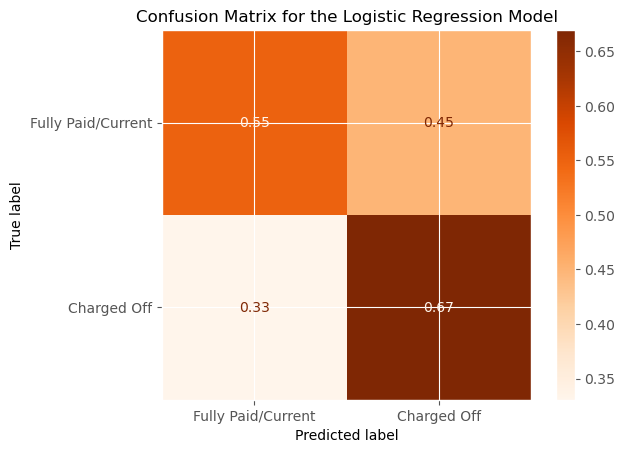

In [19]:
# show confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(lr, x_down_test, y_down_test,
                                            display_labels=['Fully Paid/Current','Charged Off'], cmap=plt.cm.Oranges, normalize='true')
disp.ax_.set_title('Confusion Matrix for the Logistic Regression Model', fontdict={'fontsize':12})

## 2.Decision Tree Classification 
#### apply the down sampling data to train the model( alll the model the same process)

In [20]:
%%time
dt = RandomForestClassifier()
dt.fit(x_down_train, y_down_train)

CPU times: user 29.3 s, sys: 281 ms, total: 29.6 s
Wall time: 29.3 s


RandomForestClassifier()

In [21]:
perf_dt = output(dt, x_down_train, y_down_train, x_down_test, y_down_test)

ROC score on train data: 1.0
ROC score on test data: 0.7339
Accuracy score on train data: 1.0
Accuracy score on test data: 0.674
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67     39549
           1       0.67      0.69      0.68     39548

    accuracy                           0.67     79097
   macro avg       0.67      0.67      0.67     79097
weighted avg       0.67      0.67      0.67     79097

Confusion Matrix:
 [[26027 13522]
 [12266 27282]]


Text(0.5, 1.0, 'Confusion Matrix for the Decision Tree Classification')

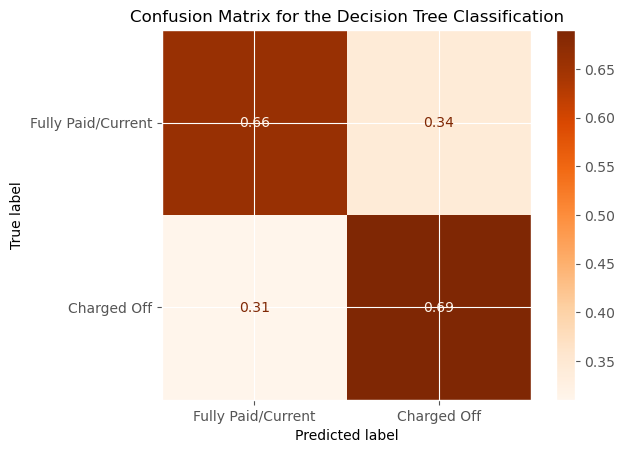

In [22]:
disp = ConfusionMatrixDisplay.from_estimator(dt, x_down_test, y_down_test,
                                            display_labels=['Fully Paid/Current','Charged Off'], cmap=plt.cm.Oranges, normalize='true')
disp.ax_.set_title('Confusion Matrix for the Decision Tree Classification', fontdict={'fontsize':12})

Text(0.5, 1.0, 'Decision Tree Feature Importance')

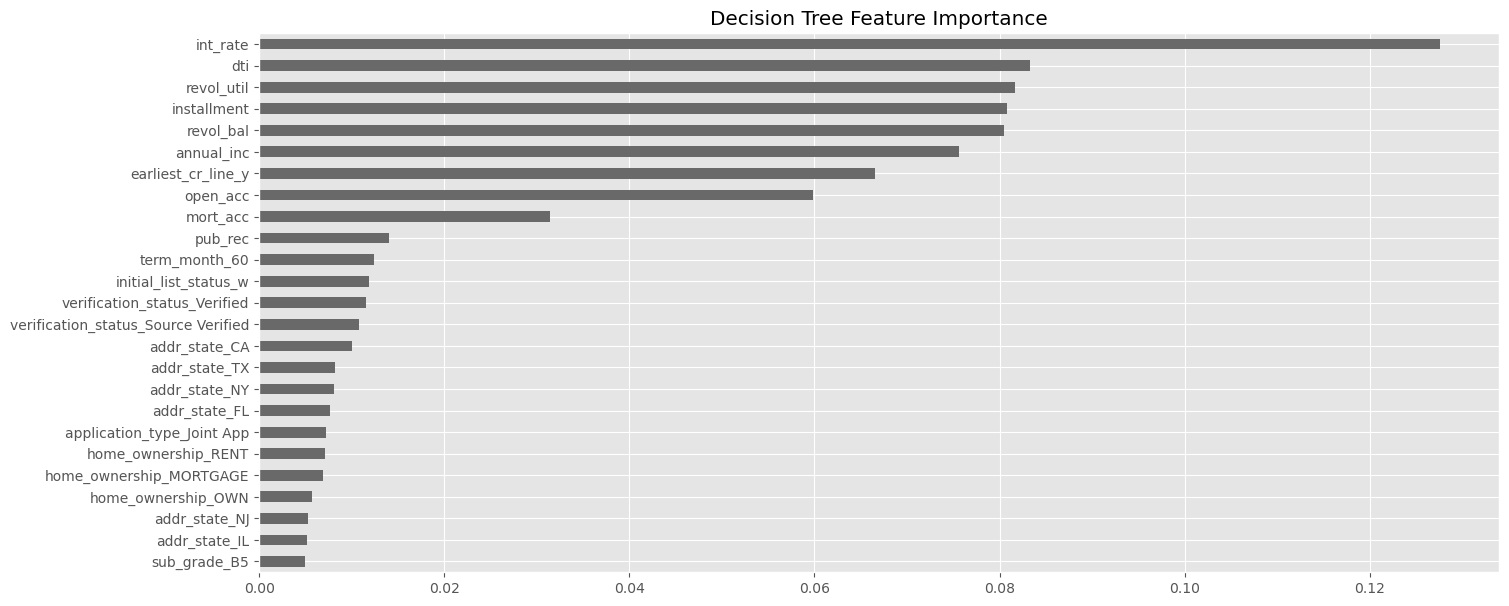

In [23]:
plt.figure(figsize=(16,7))
pd.Series(dt.feature_importances_, index=x.columns).nlargest(25).sort_values().plot(kind='barh',color='#696969') 
plt.title('Decision Tree Feature Importance')

## 3.Random Forest Classification 

In [24]:
%%time
rf = RandomForestClassifier(n_jobs = -1)
rf.fit(x_down_train, y_down_train)

CPU times: user 51.9 s, sys: 677 ms, total: 52.6 s
Wall time: 7.44 s


RandomForestClassifier(n_jobs=-1)

In [25]:
perf_rf = output(rf, x_down_train, y_down_train, x_down_test, y_down_test)

ROC score on train data: 1.0
ROC score on test data: 0.7337
Accuracy score on train data: 1.0
Accuracy score on test data: 0.6736
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67     39549
           1       0.67      0.69      0.68     39548

    accuracy                           0.67     79097
   macro avg       0.67      0.67      0.67     79097
weighted avg       0.67      0.67      0.67     79097

Confusion Matrix:
 [[25987 13562]
 [12255 27293]]


Text(0.5, 1.0, 'Confusion Matrix for the Random Forest Classification')

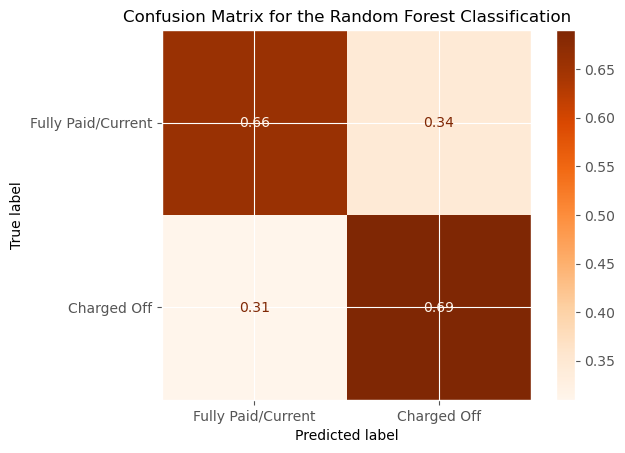

In [26]:
disp = ConfusionMatrixDisplay.from_estimator(rf, x_down_test, y_down_test,
                                            display_labels=['Fully Paid/Current','Charged Off'], cmap=plt.cm.Oranges, normalize='true')
disp.ax_.set_title('Confusion Matrix for the Random Forest Classification', fontdict={'fontsize':12})

Text(0.5, 1.0, 'Random Forest Feature Importance')

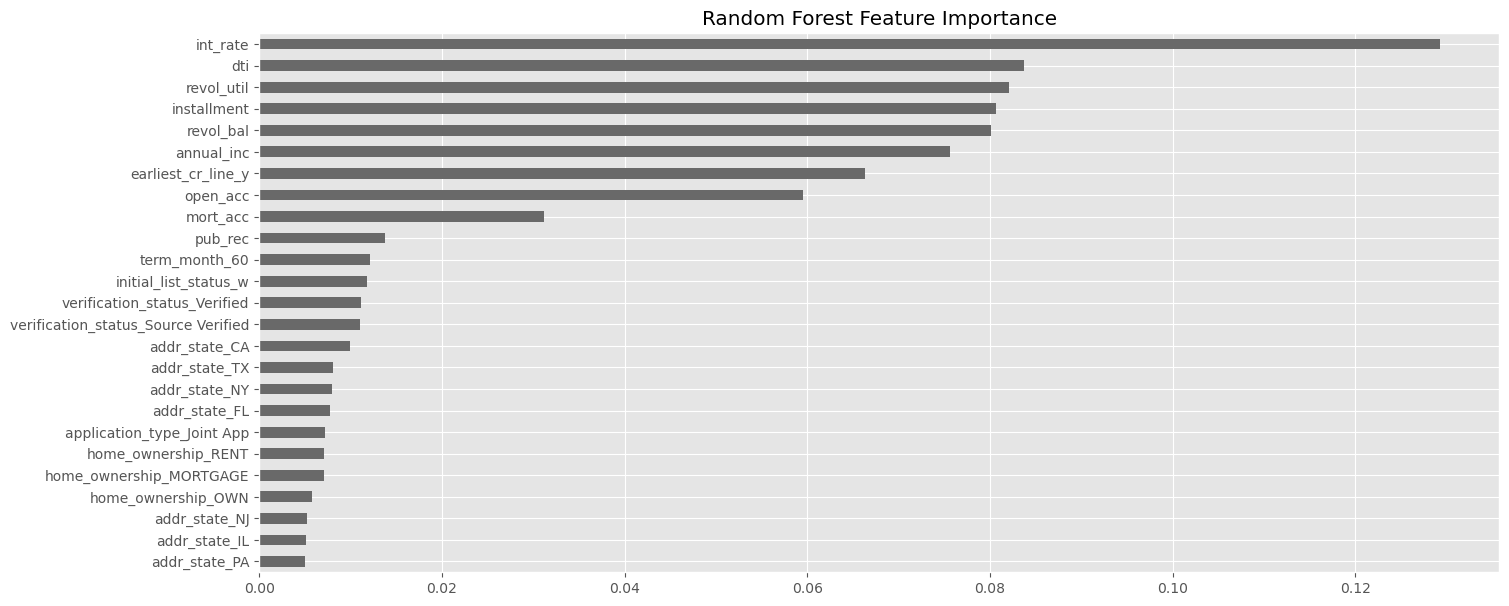

In [27]:
plt.figure(figsize=(16,7))
pd.Series(rf.feature_importances_, index=x.columns).nlargest(25).sort_values().plot(kind='barh',color='#696969') 
plt.title('Random Forest Feature Importance')

## 4.XGBoost Classification 

In [28]:
%%time
xgb=XGBClassifier()
xgb.fit(x_down_train, y_down_train)

CPU times: user 1min 23s, sys: 3.78 s, total: 1min 27s
Wall time: 11.6 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
perf_xgb = output(xgb, x_down_train, y_down_train, x_down_test, y_down_test)

ROC score on train data: 0.8016
ROC score on test data: 0.762
Accuracy score on train data: 0.7231
Accuracy score on test data: 0.6936
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.65      0.68     39549
           1       0.68      0.73      0.71     39548

    accuracy                           0.69     79097
   macro avg       0.69      0.69      0.69     79097
weighted avg       0.69      0.69      0.69     79097

Confusion Matrix:
 [[25892 13657]
 [10581 28967]]


Text(0.5, 1.0, 'Confusion Matrix for the XGBoost Classification')

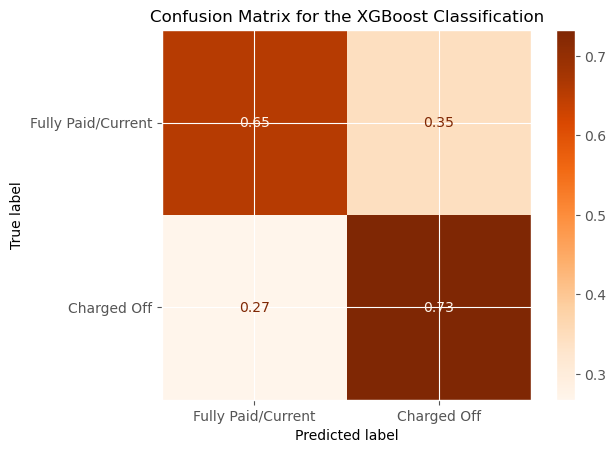

In [30]:
disp = ConfusionMatrixDisplay.from_estimator(xgb, x_down_test, y_down_test,
                                            display_labels=['Fully Paid/Current','Charged Off'], cmap=plt.cm.Oranges, normalize='true')
disp.ax_.set_title('Confusion Matrix for the XGBoost Classification', fontdict={'fontsize':12})

Text(0.5, 1.0, 'XGBoost Feature Importance')

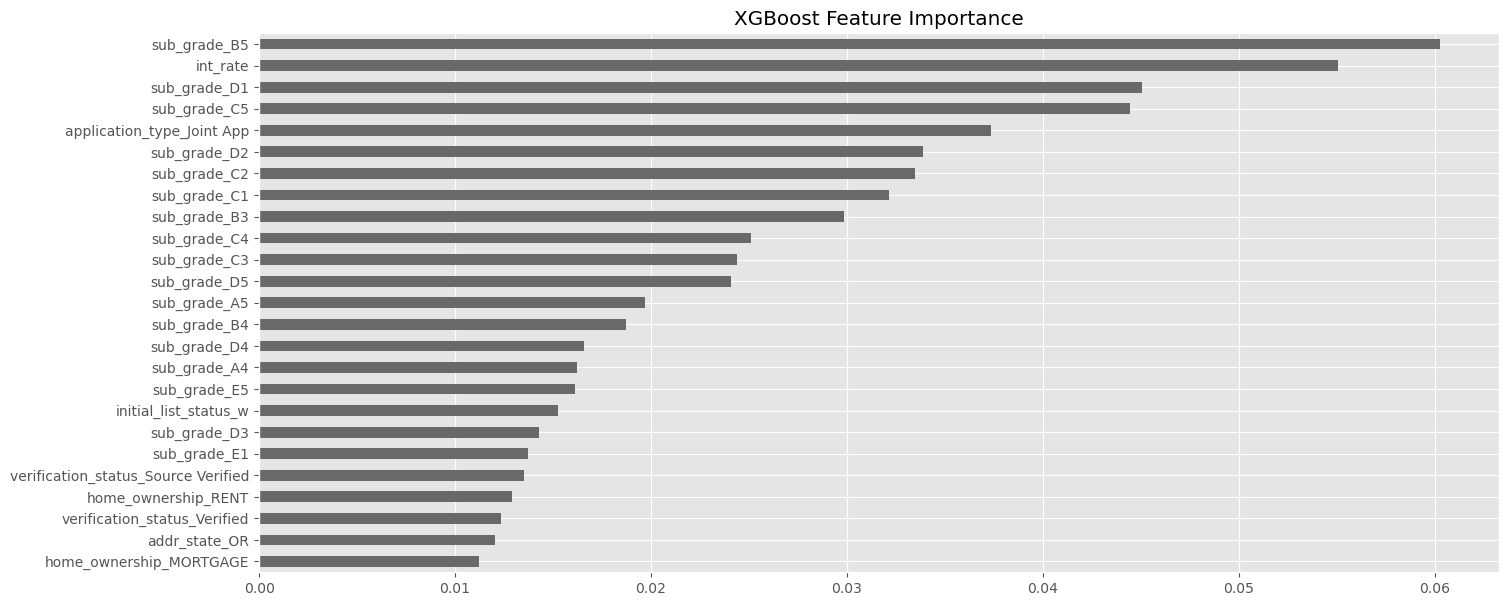

In [31]:
plt.figure(figsize=(16,7))
pd.Series(xgb.feature_importances_, index=x.columns).nlargest(25).sort_values().plot(kind='barh',color='#696969') 
plt.title('XGBoost Feature Importance')

#### we can see from above that XGBoost has the highest ROC and ACC score: 0.77 and 0.70 respectively. So we will tune XGBoost

## Hyper-parameter Tuning 
#### tuning model like randomized search cv based on XGBoost.
#### any other tuning models?

In [32]:
%%time
param_grid = dict(
    n_estimators=stats.randint(10, 500),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1),
    subsample=stats.uniform(0.5, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=3, n_iter=60, 
    scoring='roc_auc', n_jobs=-1, verbose=1,
)
xgb_cv.fit(x_down_train, y_down_train)

best_params = xgb_cv.best_params_
print(f"Best Parameters: {best_params}")

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rufen/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/rufen/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/rufen/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


KeyboardInterrupt: 

In [33]:
best_params = {'learning_rate': 0.11995808621210047,
 'max_depth': 4,
 'n_estimators': 471,
 'subsample': 0.7805150563356289}

In [34]:
xgb_tuned = XGBClassifier(**best_params)
xgb_tuned.fit(X_down_train, y_down_train)

NameError: name 'X_down_train' is not defined

In [ ]:
perf_xgb_tuned = output(xgb_tuned, x_down_train, y_down_train, x_down_test, y_down_test)

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(xgb_tuned, x_down_test, y_down_test,
                                            display_labels=['Fully Paid/Current','Charged Off'], cmap=plt.cm.Oranges, normalize='true')
disp.ax_.set_title('Confusion Matrix for the XGBoost Classification', fontdict={'fontsize':12})

In [ ]:
plt.figure(figsize=(16,7))
pd.Series(xgb_tuned.feature_importances_, index=x.columns).nlargest(25).sort_values().plot(kind='barh',color='#696969') 
plt.title('XGBoost Feature Importance')

#### except the feature importance, other scores no big difference 

# Test Model 
#### format the test data first, make sure it has the same fearues as the down_sample_data, and then use XGBoost to predict.

In [35]:
feature_test = ['loan_amnt',
 'term',
 'int_rate',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'addr_state',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'issue_d',
 'earliest_cr_line']

In [37]:
data_test = pd.read_csv('/Users/rufen/Downloads/data_project1/test_data.csv',usecols=feature_test)
data_test.head()

,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,application_type,mort_acc
0,1900,36 months,26.57,F5,RENT,30000.0,Source Verified,Mar-2016,other,TN,46.88,Jun-2009,13.0,0.0,3000,65.2,w,Individual,0.0
1,10500,36 months,14.65,C5,RENT,30000.0,Not Verified,Oct-2015,credit_card,NM,21.76,Aug-2010,10.0,0.0,15296,55.0,f,Individual,0.0
2,28000,60 months,11.80,B4,MORTGAGE,108000.0,Not Verified,Nov-2018,debt_consolidation,FL,16.58,Jan-1998,12.0,0.0,19236,21.5,w,Individual,1.0
3,15000,36 months,14.52,C3,RENT,70000.0,Verified,Jun-2018,credit_card,NY,22.89,May-2004,8.0,0.0,31401,62.4,f,Individual,0.0
4,35000,60 months,17.47,D1,MORTGAGE,100000.0,Verified,May-2018,debt_consolidation,CA,22.28,Jul-1995,18.0,0.0,10459,12.1,w,Joint App,2.0


In [38]:
data_test.shape

(211627, 19)

In [39]:
data_test['issue_y'] = pd.DatetimeIndex(data_test['issue_d']).year.astype('Int64')
data_test['earliest_cr_line_y'] = 2023-pd.DatetimeIndex(data_test['earliest_cr_line']).year

data_test.drop(columns=['issue_d','earliest_cr_line'], inplace=True)

In [40]:
def remove_outlier(df,col):
    mean = df[col].mean()
    std = df[col].std()
    return df[np.abs(df[col]-mean) <= (3*std)]

removel = ['annual_inc','dti','revol_bal','revol_util']
for col in removel:
    loan = remove_outlier(data_test,col)
    print(f'After remove outliers from {col}, we have {loan.shape[0]} rows left.')

After remove outliers from annual_inc, we have 209845 rows left.
After remove outliers from dti, we have 210717 rows left.
After remove outliers from revol_bal, we have 209115 rows left.
After remove outliers from revol_util, we have 211466 rows left.


In [41]:
loan.shape

(211466, 19)

In [42]:
dummy = [column for column in loan.columns if loan[column].dtype == object]
loan_test = pd.get_dummies(loan, columns=dummy, drop_first=True)
loan_test.shape

(211466, 114)

In [43]:
list(loan_test.columns.values)

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'mort_acc',
 'issue_y',
 'earliest_cr_line_y',
 'term_ 60 months',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_house',


In [51]:
list(x_down_train.columns.values)

['int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'mort_acc',
 'earliest_cr_line_y',
 'term_month_60',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',


#### Some features in test set have different values and location compared with the training set. I need to complete some rearrange job, since in sklearn, test models are typically based on the location of features rather than the name of features.

In [45]:
loan_test['term'] = loan_test['term_ 60 months'].map({1:60, 0:36})
loan_test.drop(columns='term_ 60 months', inplace=True)

In [46]:
loan_test['home_ownership_NONE'] = 0
loan_test['purpose_educational'] = 0
loan_test['addr_state_IA'] = 0

In [52]:
x_down_train.columns.values

array(['int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'mort_acc',
       'earliest_cr_line_y', 'term_month_60', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified',
       'verification_status_Verified', 'addr_state_AL', 'addr_state_AR',
  

In [55]:
loan_test = loan_test.reindex(columns=['int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'mort_acc',
       'earliest_cr_line_y', 'term_month_60', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified',
       'verification_status_Verified', 'addr_state_AL', 'addr_state_AR',
       'addr_state_AZ', 'addr_state_CA', 'addr_state_CO', 'addr_state_CT',
       'addr_state_DC', 'addr_state_DE', 'addr_state_FL', 'addr_state_GA',
       'addr_state_HI', 'addr_state_IA', 'addr_state_ID', 'addr_state_IL',
       'addr_state_IN', 'addr_state_KS', 'addr_state_KY', 'addr_state_LA',
       'addr_state_MA', 'addr_state_MD', 'addr_state_ME', 'addr_state_MI',
       'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_MT',
       'addr_state_NC', 'addr_state_ND', 'addr_state_NE', 'addr_state_NH',
       'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY',
       'addr_state_OH', 'addr_state_OK', 'addr_state_OR', 'addr_state_PA',
       'addr_state_RI', 'addr_state_SC', 'addr_state_SD', 'addr_state_TN',
       'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT',
       'addr_state_WA', 'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'initial_list_status_w', 'application_type_Joint App'])

loan_test.head()

,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,earliest_cr_line_y,term_month_60,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
0,26.57,NaN,30000.0,46.88,13.0,0.0,3000,65.2,0.0,14,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,14.65,NaN,30000.0,21.76,10.0,0.0,15296,55.0,0.0,13,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11.80,NaN,108000.0,16.58,12.0,0.0,19236,21.5,1.0,25,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,14.52,NaN,70000.0,22.89,8.0,0.0,31401,62.4,0.0,19,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.47,NaN,100000.0,22.28,18.0,0.0,10459,12.1,2.0,28,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [56]:
loan_test.shape

(211466, 103)

In [57]:
miss_rate = pd.DataFrame(loan_test.isnull().mean().round(2).sort_values(ascending=False))
miss_rate.reset_index(inplace=True)
miss_rate.rename(columns={'index':'feature',0:'missing_rate'},inplace=True)
miss_rate

,feature,missing_rate
0,installment,1.0
1,term_month_60,1.0
2,addr_state_IN,0.0
3,addr_state_MS,0.0
4,addr_state_MO,0.0
5,addr_state_MN,0.0
6,addr_state_MI,0.0
7,addr_state_ME,0.0
8,addr_state_MD,0.0
9,addr_state_MA,0.0


### no missing rate in the data , then we can apply XGBoost to test dataset

In [ ]:
pred = pd.DataFrame({'prediction_score': xgb_tuned.predict(loan_test)})
pred.reset_index(inplace=True)
pred

In [ ]:
pred.to_csv('predictions_rw.csv', index=False)